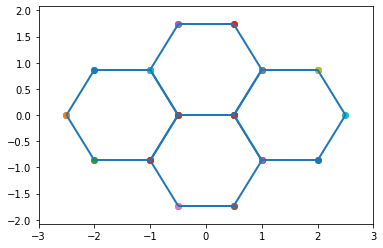

In [2]:
import numpy as np
import scipy.spatial
import copy
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import collections  as mc
from classes import Vertex, Edge, Polygon
from functions import *

from init_2D import edge_assignments, polygon_assignments





2.5980762113533156


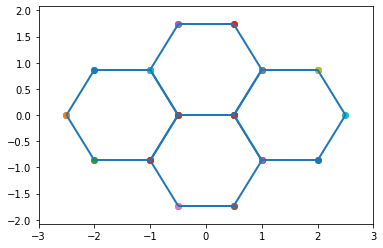

In [3]:
cos_30=3**(1/2)/2
l=1
p=[[l/2,0],[l,l*cos_30],[l/2,2*l*cos_30]]
q=[[2*l,l*cos_30],[5*l/2,0]]

Polygon.a_0=np.mean([poly.area() for poly in polygon_assignments(p,q)])
Polygon.p_0=2
Polygon.k_a=10000

print(Polygon.a_0)

plotter_2D(np.concatenate(edge_assignments(p,q),axis=0))

In [11]:


def vertex_monte_carlo(l,p,q,epsilon,trials,state=None):
    n=0
    pf,qf=gen_rnd_2D(l,p,q,epsilon,state)
   
    energy=np.sum([p.energy() for p in polygon_assignments(pf,qf,state)])
    while n<trials:
        pt,qt=gen_rnd_2D(l,p,q,epsilon,state)
        
        
        energy_t=np.sum([p.energy() for p in polygon_assignments(pt,qt,state)])
        if energy_t<energy:
            pf=copy.deepcopy(pt)
            qf=copy.deepcopy(qt)
            
            energy=energy_t
        n+=1
    
    return pf,qf,energy

How the randomized evolution process works:

(i) Start with the initial configuration of generator poitns.
(ii) Pick a new, smaller value for the driven edge instance, by pickeing a lower value for the p_0 generator's x value 
(iii) add random values to all the other generators. To preserve the symmetry assumption, you should only do this in a certain way. For example, q3 should always have y=0. And as the edge is shrinking, the p_0 y value shoudl also be 0. (and after shrinking, the p_0 corodinates must maintain x=0)

---

This randomizer needs a string input on whether to change to x- or y- value of p0.

<function matplotlib.pyplot.show(close=None, block=None)>

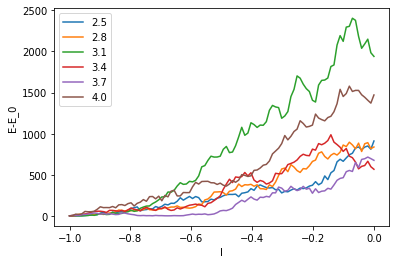

In [10]:
cos_30=3**(1/2)/2
l=1
array,epsilon=np.linspace(l,0,100,retstep=True)




for p_0 in np.linspace(2.5,4,6):
    Polygon.p_0=p_0
    x=[]
    energy=[]

    p=[[l/2,0],[l,l*cos_30],[l/2,2*l*cos_30]]
    q=[[2*l,l*cos_30],[5*l/2,0]]
    #counter=0
    for length in array:
        pf,qf,e=vertex_monte_carlo(length,p,q,epsilon,100,None)
        #print("Energy=",e)
        energy.append(e)
        x.append(-length)
        p=copy.deepcopy(pf)
        q=copy.deepcopy(qf)
        
        #counter+=1
        #if counter%10==0:
        #    print(length)
        #    #print(p,q)
        #    print("Energy=",e)
        #    plotter_2D(np.concatenate(edge_assignments(p,q),axis=0))
        #    plt.show()
    
    plt.plot(x,np.subtract(energy,np.full(len(energy),energy[0])),label=p_0 )

plt.legend()
plt.xlabel("l")
plt.ylabel("E-E_0")
plt.show

In [ ]:
counter=0
for length in reversed(array):
    pf,qf,e=vertex_monte_carlo(length,p,q,epsilon,"post",100)
    #print("Energy=",e)
    energy.append(e)
    x.append(length)
    p=copy.deepcopy(pf)
    q=copy.deepcopy(qf)
    counter+=1
    if counter%10==0:
        print(length)
        #print(p,q)
        print("Energy=",e)
        plotter_2D(np.concatenate(edge_assignments(p,q,"post"),axis=0))

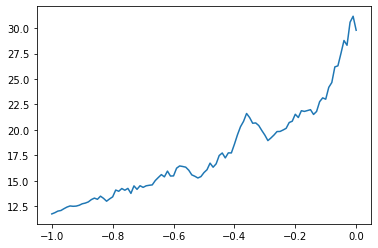

In [40]:
plt.plot(x,energy)